In [4]:
import ema_workbench
import pysubgroup as ps
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
def visualize_precision_and_recall(result):

    print(result)

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(result['target_share_sg'], result['coverage_sg'], c='blue', marker='o')

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt

In [6]:
data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Bryant et al 2010.csv')

target = ps.BinaryTarget('Greater than 90%', True)
search_space = ps.create_selectors(data, ignore={'Less than 10%', 'Greater than 90%'})
print(data)

     renew req %  Pricing  Cellulosic cost  Total biomass  \
0           0.25        1       124.900002     612.799988   
1           0.25        1        67.300003     837.200012   
2           0.25        1        71.000000     740.400024   
3           0.25        1        80.099998     995.599976   
4           0.25        1        76.400002     476.399994   
..           ...      ...              ...            ...   
877         0.25        1        99.199997     511.600006   
878         0.25        1       102.400002     751.400024   
879         0.25        1       100.000000     527.000000   
880         0.25        1       108.300003     694.200012   
881         0.25        1       121.099998     588.599976   

     Feedstock distribution  Cellulosic yield  Oil elasticity  \
0                      0.04         89.500000           0.206   
1                      0.18         95.900002           0.277   
2                      0.80         83.500000           0.445   
3      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     quality                                           subgroup  size_sg  \
0   0.080657          Expen change>=59.49 AND renew req %==0.25      177   
1   0.080657                                Expen change>=59.49      177   
2   0.080657                 Expen change>=59.49 AND Pricing==1      177   
3   0.080657  Expen change>=59.49 AND Pricing==1 AND renew r...      177   
4   0.070754   Expen change>=59.49 AND Incremental cost>=250.58      105   
..       ...                                                ...      ...   
95  0.024798  Demand elasticity>=-0.32 AND Expen change>=59....       31   
96  0.023883  Demand elasticity>=-0.32 AND Pricing==1 AND in...       39   
97  0.023883  Demand elasticity>=-0.32 AND Pricing==1 AND in...       39   
98  0.023883  Demand elasticity>=-0.32 AND input record<1211...       39   
99  0.023883     Demand elasticity>=-0.32 AND input record<1211       39   

    size_dataset  positives_sg  positives_dataset  size_complement  \
0            882 

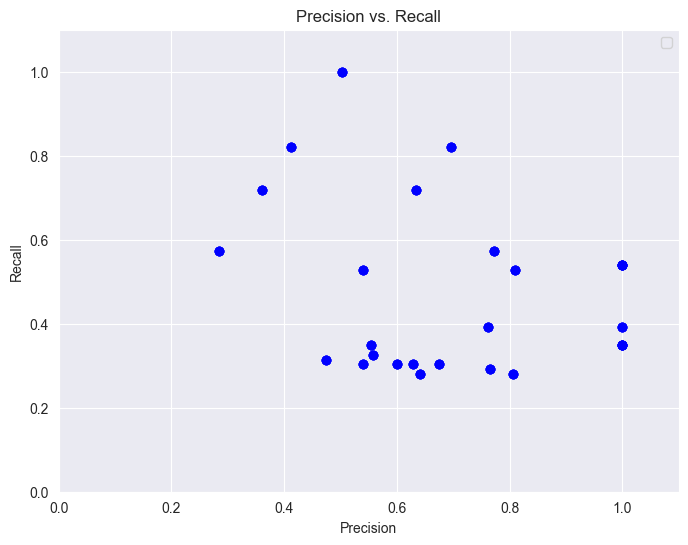

In [7]:
#result_set_size is number of sg which should be created
#if a new subgroup is created and we already have result_set_size subgroups its added if the quality is higher than the one of the lowest quality added yet
#TODO: whats about parameter depth
task = ps.SubgroupDiscoveryTask(data, target, search_space, result_set_size=100, depth=400, qf=ps.WRAccQF())
result = ps.DFS().execute(task)
#Recall in this statistics is meant by coverage sg
#Target_share_sg_means Precision

visualize_precision_and_recall(result.to_dataframe()).show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     quality                                           subgroup  size_sg  \
0   0.080657          Expen change>=59.49 AND renew req %==0.25      177   
1   0.080657                                Expen change>=59.49      177   
2   0.080657  Expen change>=59.49 AND Pricing==1 AND renew r...      177   
3   0.080657                 Expen change>=59.49 AND Pricing==1      177   
4   0.070754  Expen change>=59.49 AND Incremental cost>=250....      105   
..       ...                                                ...      ...   
95  0.024798  Demand elasticity>=-0.32 AND Expen change>=59....       31   
96  0.023883  Demand elasticity>=-0.32 AND Pricing==1 AND in...       39   
97  0.023883  Demand elasticity>=-0.32 AND input record<1211...       39   
98  0.023883  Demand elasticity>=-0.32 AND Pricing==1 AND in...       39   
99  0.023883     Demand elasticity>=-0.32 AND input record<1211       39   

    size_dataset  positives_sg  positives_dataset  size_complement  \
0            882 

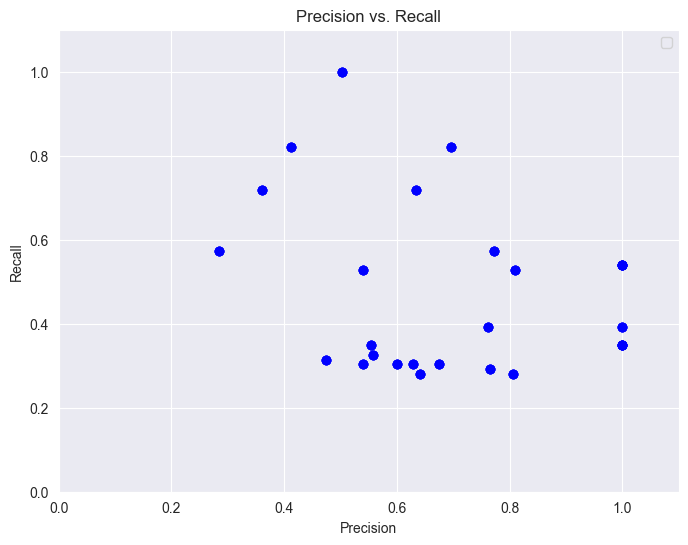

In [8]:
result = ps.BeamSearch(beam_width=300).execute(task)
visualize_precision_and_recall(result.to_dataframe()).show()

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/pysubgroup/binary_target.py:356: RuntimeWarning: invalid value encountered in divide
  p_subgroup = np.divide(positives_subgroup, instances_subgroup)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     quality                                           subgroup  size_sg  \
0   0.080657                                Expen change>=59.49      177   
1   0.080657                 Expen change>=59.49 AND Pricing==1      177   
2   0.080657  Expen change>=59.49 AND Pricing==1 AND renew r...      177   
3   0.080657          Expen change>=59.49 AND renew req %==0.25      177   
4   0.070754  Expen change>=59.49 AND Incremental cost>=250....      105   
..       ...                                                ...      ...   
95  0.024798  Demand elasticity>=-0.32 AND Expen change>=59....       31   
96  0.023883  Demand elasticity>=-0.32 AND Pricing==1 AND in...       39   
97  0.023883  Demand elasticity>=-0.32 AND input record<1211...       39   
98  0.023883  Demand elasticity>=-0.32 AND Pricing==1 AND in...       39   
99  0.023883     Demand elasticity>=-0.32 AND input record<1211       39   

    size_dataset  positives_sg  positives_dataset  size_complement  \
0            882 

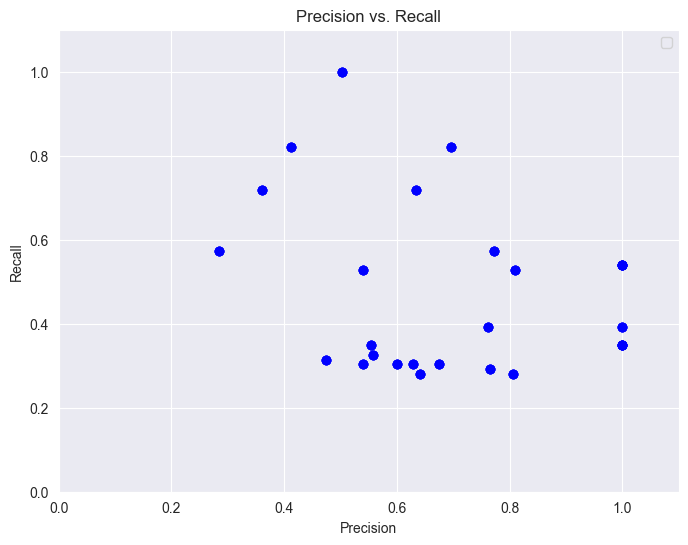

In [9]:
result = ps.Apriori().execute(task)
visualize_precision_and_recall(result.to_dataframe()).show()